# Statistical Inference with Linear Regression

## Get Data from Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d impapan/student-performance-data-set

  0% 0.00/21.3k [00:00<?, ?B/s]
100% 21.3k/21.3k [00:00<00:00, 18.2MB/s]


In [5]:
!unzip student-performance-data-set.zip -d student-performance-dataset

Archive:  student-performance-data-set.zip
  inflating: student-performance-dataset/student/student-mat.csv  
  inflating: student-performance-dataset/student/student-por.csv  
  inflating: student-performance-dataset/student/student.txt  


## Import Libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [7]:
data = pd.read_csv('student-performance-dataset/student/student-mat.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.isna().sum().sum()

0

In [9]:
keep_vars = ['school', 'sex', 'address', 'famsize', 'Medu', 'Fedu', 'studytime', 
             'schoolsup', 'famsup', 'paid', 'internet', 'romantic', 'freetime', 
             'goout']
y = data['G3'].copy()
len(keep_vars)

14

In [10]:
X = data[keep_vars].copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   sex        395 non-null    object
 2   address    395 non-null    object
 3   famsize    395 non-null    object
 4   Medu       395 non-null    int64 
 5   Fedu       395 non-null    int64 
 6   studytime  395 non-null    int64 
 7   schoolsup  395 non-null    object
 8   famsup     395 non-null    object
 9   paid       395 non-null    object
 10  internet   395 non-null    object
 11  romantic   395 non-null    object
 12  freetime   395 non-null    int64 
 13  goout      395 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 43.3+ KB


## Assumptions of Linear Regression

1. Homoskedasticity
2. Normallity
3. Observations are independent <- Take for granted

**Bonus: No multicollinearity**

## Explore Variables

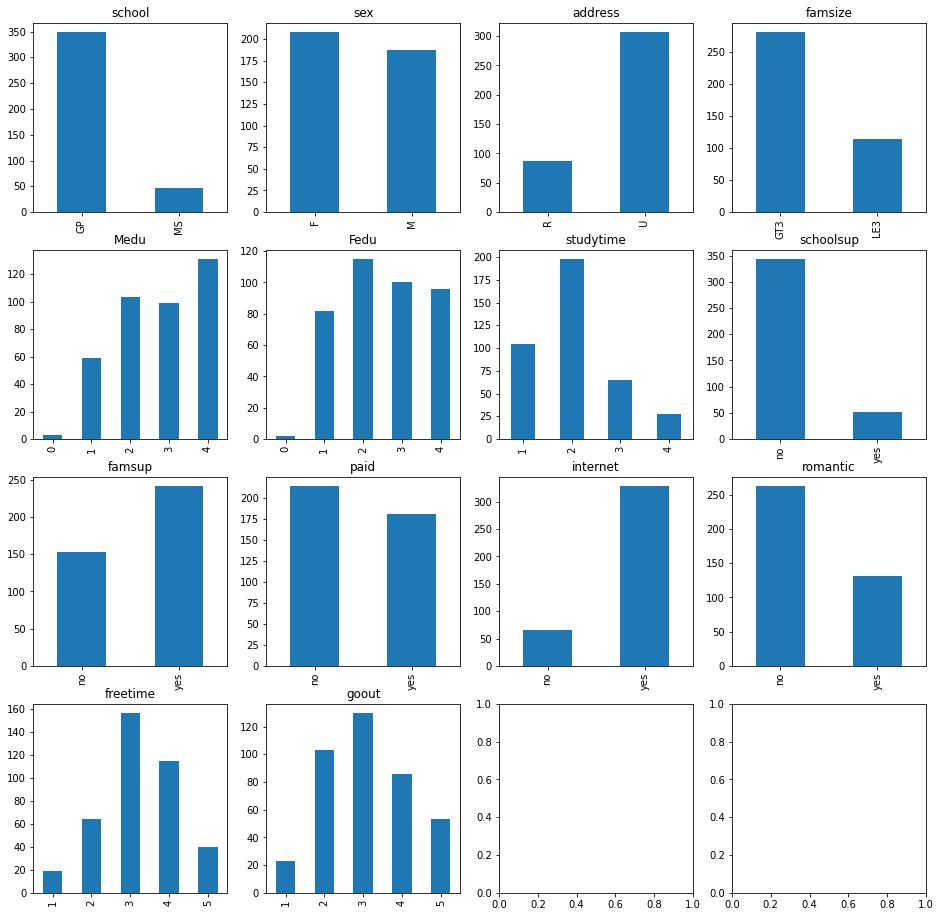

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
i = 0
for col in X.columns:
  X[col].value_counts().sort_index().plot.bar(ax=axes[i//4, i%4])
  axes[i//4, i%4].set_title(col)
  i+= 1

In [12]:
binary_vars = ['school', 'sex', 'address', 'famsize', 'schoolsup', 'famsup', 'paid', 'internet', 'romantic']
X_binary = X[binary_vars].copy()
X_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   sex        395 non-null    object
 2   address    395 non-null    object
 3   famsize    395 non-null    object
 4   schoolsup  395 non-null    object
 5   famsup     395 non-null    object
 6   paid       395 non-null    object
 7   internet   395 non-null    object
 8   romantic   395 non-null    object
dtypes: object(9)
memory usage: 27.9+ KB


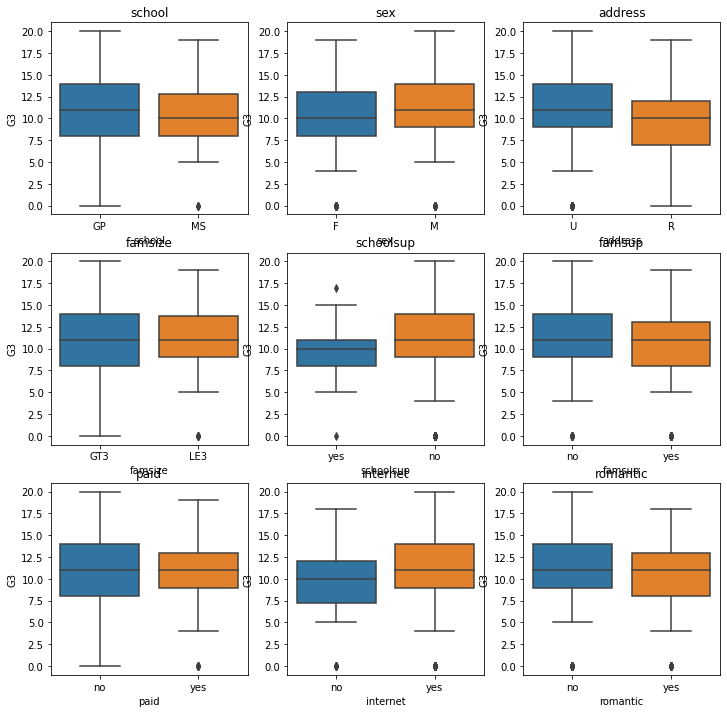

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
i = 0
for col in X_binary.columns:
  sns.boxplot(x=X_binary[col], y=y, ax=axes[i // 3, i % 3])
  axes[i//3, i%3].set_title(col)
  i+= 1

#### Make Dummy Variables

In [14]:
X_dummies = pd.get_dummies(X_binary, drop_first=True)
X_dummies.head()

,school_MS,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,internet_yes,romantic_yes
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,0,1,0
2,0,0,1,1,1,0,1,1,0
3,0,0,1,0,0,1,1,1,1
4,0,0,1,0,0,1,1,0,0


#### Check for Correlation between Independent Variables

In [15]:
X[X_binary.columns] = X_dummies.copy()
X.head()

,school,sex,address,famsize,Medu,Fedu,studytime,schoolsup,famsup,paid,internet,romantic,freetime,goout
0,0,0,1,0,4,4,2,1,0,0,0,0,3,4
1,0,0,1,0,1,1,2,0,1,0,1,0,3,3
2,0,0,1,1,1,1,2,1,0,1,1,0,3,2
3,0,0,1,0,4,2,3,0,1,1,1,1,2,2
4,0,0,1,0,3,3,2,0,1,1,0,0,3,2


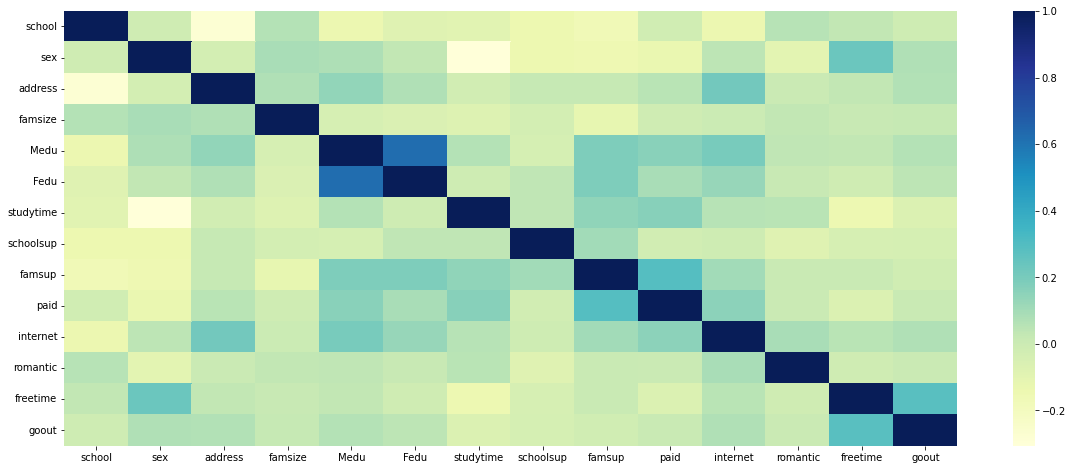

In [16]:
cormat = X.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cormat, cmap='YlGnBu');

In [24]:
# save the data
from pathlib import Path 

save_path = Path('drive', 'MyDrive', 'Colab Notebooks', 'SuperFastCourse', 'LinReg') / 'prepped_data.csv'

data_save = X.copy() 
data_save['G3'] = y.copy() 
data_save.to_csv(save_path)

## Run Regression

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4.730
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           5.24e-08
Time:                        00:06:25   Log-Likelihood:                -1129.5
No. Observations:                 395   AIC:                             2289.
Df Residuals:                     380   BIC:                             2349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9728      1.330      5.242      0.0

## Examine Residuals

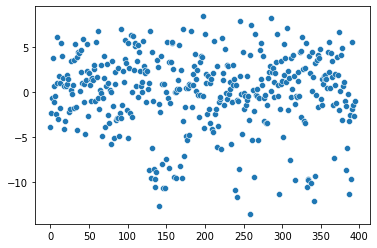

In [ ]:
res = results.resid
sns.scatterplot(x=res.index, y=res);

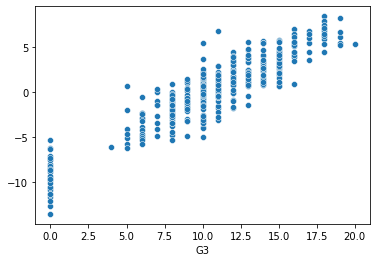

In [ ]:
sns.scatterplot(x=y, y=res);

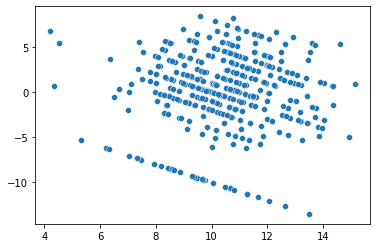

In [ ]:
pred = results.predict(X)
sns.scatterplot(x=pred, y=res);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


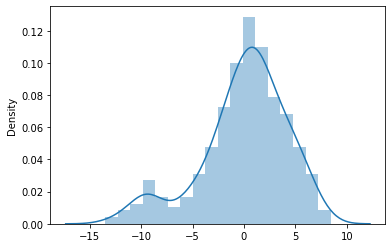

In [ ]:
sns.distplot(res);

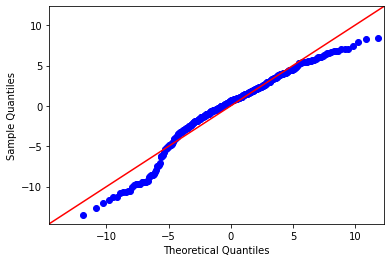

In [ ]:
sm.graphics.qqplot(res, loc=res.mean(), scale=res.std(), line='45');

## Interpret Results